In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("uci-news-aggregator.csv")

In [3]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
df.CATEGORY.value_counts()

e    152469
b    115971
t    108344
m     45640
Name: CATEGORY, dtype: int64

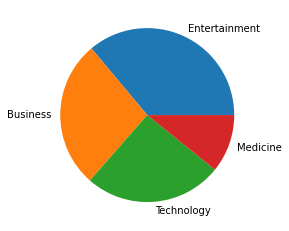

In [5]:
cat_labels=["Entertainment","Business","Technology","Medicine"]
plt.pie(df.CATEGORY.value_counts(),labels=cat_labels)
plt.show()

In [6]:
# regex is used for manipulating with textual data
import re

In [7]:
#Write a function to standardise/normalise the complete data
#Since, for eg 'May' and 'may' both are considered two different identities by python, we try to convert the
#entire textual data into lowercase

def normalize_text(s):
    s=s.lower()
   
    # Remove punctuations that is not word-internal(Hyphens,apostro.)
    s=re.sub('\s\W',' ',s)
    s=re.sub('\W\s',' ',s)
    
    #Remove double spaces
    s=re.sub('\s+',' ',s)
    
    return s

In [8]:
#\s\W --> Any character that is not a word and has a space before it

In [9]:
df["Text"] = [normalize_text(s) for s in df["TITLE"]]

In [10]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,Text
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,fed official says weak data caused by weather ...
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,fed's charles plosser sees high bar for change...
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550,us open stocks fall after fed official hints a...
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,fed risks falling behind the curve' charles pl...
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,fed's plosser nasty weather has curbed job growth


In [11]:
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP', 'Text'],
      dtype='object')

# Feature Extraction

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#Pull the data in vectors

vectorizer=CountVectorizer()

x=vectorizer.fit_transform(df["Text"])
x

<422424x54637 sparse matrix of type '<class 'numpy.int64'>'
	with 3747887 stored elements in Compressed Sparse Row format>

In [13]:
#Encode the target variable

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

y=encoder.fit_transform(df["CATEGORY"])
y

array([0, 0, 0, ..., 0, 2, 0])

# Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=456)

In [16]:
x_train.shape

(316818, 54637)

# Applying the Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
mb = MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import classification_report

from sklearn import metrics

In [29]:
#Confusion Matrix
matrix = metrics.confusion_matrix(y_test,y_pred)
matrix

array([[26199,   541,   421,  1959],
       [  499, 36663,   232,   685],
       [  410,   353, 10345,   198],
       [ 1778,   480,   283, 24560]], dtype=int64)

In [30]:
y_pred = mb.predict(x_test)

In [31]:
y_pred

array([1, 0, 3, ..., 0, 0, 2])

In [32]:
y_test

array([1, 3, 0, ..., 0, 0, 2])

In [33]:
mb.score(x_test,y_test)

0.9257712629964207

# Application for the same

In [34]:
def predict_cat(title):
    cat_names={"b":"Business", "t":"Technology", "e":"Entertainment", "m":"Medical"}
    cod=mb.predict(vectorizer.transform([title]))
    return cat_names[encoder.inverse_transform(cod)[0]]

In [35]:
print(predict_cat("The study utilized data generated from newborn screening (NBS) specimens. Women whose infants’ dried blood spot (DBS) specimens had completed routine newborn screening were included. DBS specimens arriving at the NBS screening program in March of 2019 served as the controls and DBS from November 4, 2019, through December 31, 2020, were the study samples."))

Medical


In [36]:
print(predict_cat("Apart from '83, the trailer of Sajid Nadiadwala's Tadap featuring Ahan Shetty and Tara Sutaria, which was released a few days back, will also be attached to the prints of Sooryavanshi. The trailer of Satyameva Jayate 2 and Antim-The Final Truth has not been attached to the prints of Sooryavanshi. Both films will be released in the last week of November."))

Entertainment


In [37]:
print(predict_cat("The central bank also stressed that the PCA Framework does not preclude the Reserve Bank of India from taking any other action as it deems fit at any time, in addition to the corrective actions prescribed in the framework.Indicators to be tracked for capital, asset quality and leverage would be CRAR/Common Equity Tier I Ratio, Net NPA Ratio and Tier I Leverage Ratio, respectively,according to the revised framework.Breach of any risk threshold may result in invocation of the PCA.")) 

Business
